<h1>Applied Data Science Capstone Project</h1>
<h3>Oleksii Pominovskyi</h3>

<h2>Topic: Selecting the best area to open a new cafe in Düsseldorf</h2>

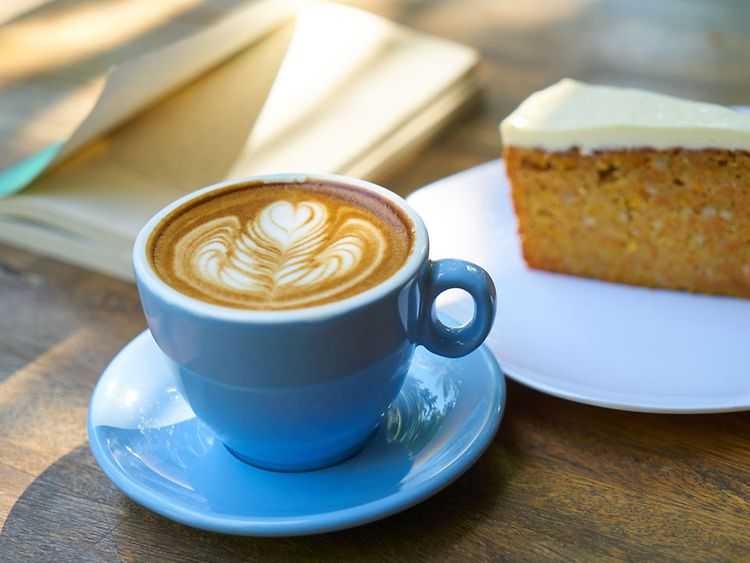

<h2><em>Business Problem</em></h2>

I am considering a simple business idea of opening a café in Düsseldorf, Germany.
Though the competition is quite high, this city is growing, and the number of tourists is increasing constantly.
Therefore, the prospect of the stable consumption is optimistic, if the café may stand out.

To resolve this task, I would love to conduct the locations analysis utilizing Foursquare data.
I expect to get data on the existing cafes location, and how they correlate with the areas of offices and shops location. Also, I would love to cluster existing cafes by the range of services they offer.
All this data will be a perfect addition to the field research, and serves as the objective grounding for the decision-making.


<em><h2>Elaboration on the business case</em></h2>

<ul>
    <li>This case may seem as not that complex business one, but what I am trying to achieve here is to understand if the tools and techniques of data science can serve their purpose on the level of small business decision making.</li>
 <li>When it comes to the selection of the location for the café in a big city, it seems logical to verify own intuitive assumptions about the location trough the perspective of the objective data analysis – where are competitors concentrated, what do they offer etc.</li></ul>
    
Therefore, the <strong>target audience</strong> of the results of this exploratory analysis are not the potential café owners themselves, but also those who can be inspired by the use of similar techniques for the urban planning, small business distribution analysis etc.


<h2><em>Data section</h2></em>

<ul>
    <li>As there in no single list of existing café in Düsseldorf, the major source of data to be utilized is the Foursquare API Endpoints (https://developer.foursquare.com/docs/places-api/endpoints/) to get the list of venues, where the filtering will be made by names (with the key words as “café” in name) and  by services – all with the purpose to identify those venues which offer coffee as a separate service,</li>
<li>The same will apply to the offices and shops detection (searching by key elements - Foursquare API Endpoints),</li>
<li>Obtained data is expected to be processes in the way:
<ul><li>Put both café and offices on the map, calculate their numbers in various areas of the city,</li>
<li>Apply k-means clustering in order to detect the most typical services included in the café range,</li>
<li>Apply k-means clustering in order to detect the relevance of the location, services and customers’ feedback,</li>
<li>Align locations data and the most popular services.</li>
    </ul></li></ul>

As the last step, the expert judgement will be formulated, which area and the service seem to have a potential from the perspective of the current saturation.

Obviously, the data described above, just alone can be considered as a subjective basis for the decision making, and will be complemented by other external factors and considerations.

[Foursquare API Endpoints](https://developer.foursquare.com/docs/places-api/endpoints/)


<h2><Elaboration on the business case</em></h2>

<h1>Analysis process</h1>

<h1>1. Introduction</h1>

<h3>The approach is to find all the available venues in the center of Düsseldorf, Germany,
then to to define their categories, and for the relevant (I am interedted in all what are directly focused on coffee services) to locate them on the map alongside other venues (with different visualisation), and to decide if this data makes sense to support the decision making process to selecte the area for a cafe.</h3>


<h1>2. Importing required libraries (all we may potentially need)</h1>

In [45]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Folium installed
Libraries imported.


<h1>3. Setting up credentials to connect to the Foursquare API 1</h1>

In [46]:
CLIENT_ID = 'S0322KIPZGLP4Q4KDJ2OKYHVASJPUDQGOGYQD5LXQ3U3OUPY' # your Foursquare ID
CLIENT_SECRET = 'NLFS2AB40DDYJZVLNXZON4V0OGGNLIZ4ZLXW435AGAKFR1OC' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 100

<h1>4. Define the center of Düsseldorf as the starting point for the venues search 1</h1>

In [47]:
address = 'Königsallee 45-47, 40212 Düsseldorf'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

51.2229101 6.7784179


In [48]:
radius = 1000

<h1>5. Applying 'search' function of the public Foursquare API</h1>

In [50]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=S0322KIPZGLP4Q4KDJ2OKYHVASJPUDQGOGYQD5LXQ3U3OUPY&client_secret=NLFS2AB40DDYJZVLNXZON4V0OGGNLIZ4ZLXW435AGAKFR1OC&ll=51.2229101,6.7784179&v=20180604&radius=1000&limit=100'

In [68]:
results = requests.get(url).json()
results

venues = results['response']['venues']
nearby_venues = json_normalize(venues)
nearby_venues.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,location.neighborhood,location.crossStreet,venuePage.id
0,4c5bf9766ebe2d7f8dafce2e,Deutsche Bank,"[{'id': '4bf58dd8d48988d10a951735', 'name': 'B...",v-1595060273,False,Königsallee 45-47,51.222468,6.778155,"[{'label': 'display', 'lat': 51.22246758191633...",52,40212,DE,Düsseldorf,Nordrhein-Westfalen,Deutschland,"[Königsallee 45-47, 40212 Düsseldorf, Deutschl...",NaN,NaN,NaN
1,4be0478cc9eac928544b5a6b,Neue Apotheke in der KÖ Galerie,"[{'id': '4bf58dd8d48988d10f951735', 'name': 'P...",v-1595060273,False,Königsallee 60 C,51.222266,6.779573,"[{'label': 'display', 'lat': 51.222266, 'lng':...",107,40212,DE,Düsseldorf,Nordrhein-Westfalen,Deutschland,"[Königsallee 60 C, 40212 Düsseldorf, Deutschland]",NaN,NaN,NaN
2,51b98b3b498e5904e2ba0297,Kögraben,"[{'id': '4eb1d4dd4b900d56c88a45fd', 'name': 'R...",v-1595060273,False,NaN,51.221550,6.779086,"[{'label': 'display', 'lat': 51.22154987721981...",158,40212,DE,Düsseldorf,Nordrhein-Westfalen,Deutschland,"[40212 Düsseldorf, Deutschland]",NaN,NaN,NaN
3,5abb4305cad1b651e7aa71f3,Copenhagen Coffee Lab,"[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",v-1595060273,False,Benrather Str. 10-12,51.223151,6.775888,"[{'label': 'display', 'lat': 51.22315052523695...",178,NaN,DE,Düsseldorf,Nordrhein-Westfalen,Deutschland,"[Benrather Str. 10-12, Düsseldorf, Deutschland]",Altstadt,NaN,NaN
4,4bb38633a32876b056d201fe,Commerzbank,"[{'id': '4bf58dd8d48988d10a951735', 'name': 'B...",v-1595060273,False,Breite Str. 25,51.222934,6.777045,"[{'label': 'display', 'lat': 51.22293428877528...",95,40213,DE,Düsseldorf,Nordrhein-Westfalen,Deutschland,"[Breite Str. 25, 40213 Düsseldorf, Deutschland]",NaN,NaN,NaN


<h1>6.Grooming data in the table to make it more readable, for the categories in the first place 1</h1>

In [69]:
# filter columns
filtered_columns = ['name', 'categories', 'location.lat', 'location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    
# filter the category for each row
nearby_venues['categories'] = nearby_venues.apply(get_category_type, axis=1)
# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]
pd.set_option('display.max_rows', None)
print(nearby_venues)

                                  name                     categories  \
0                        Deutsche Bank                           Bank   
1      Neue Apotheke in der KÖ Galerie                       Pharmacy   
2                             Kögraben                          River   
3                Copenhagen Coffee Lab                           Café   
4                          Commerzbank                           Bank   
5                        U+H Oststraße                  Metro Station   
6                     Satellite Office                Coworking Space   
7                   Alexander M. Turek                   Tech Startup   
8                              Kö-Park                           Park   
9                           Carlsplatz                          Plaza   
10                              Saturn              Electronics Store   
11                   Starbucks Reserve                    Coffee Shop   
12                              SEVENS             

<h1>7. Grouping data by categories.</h1>

In [72]:
nearby_venues.groupby('categories').size().reset_index(name='counts')

,categories,counts
0,Accessories Store,1
1,American Restaurant,1
2,Antique Shop,1
3,Asian Restaurant,1
4,Bank,3
5,Bike Rental / Bike Share,1
6,Bike Shop,1
7,Boutique,15
8,Bridge,1
9,Burrito Place,1


<h1>8. Visualizing venues on the map</h1>
<h2>Checking data in the table above, I select categories <strong>'Cafe' and 'Coffee Shop'</strong> as those which are for my primary interest.
I am going to put them on the map with the labels of green color, and the rest of venues with markes of red color.</h2>

In [73]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=15)
# add a red circle marker to represent the BEDOKVILLE
folium.features.CircleMarker(
    [latitude, longitude],
    color='red',
    popup='Düsseldorf',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

def color(label): 
    if label in ['Café','Coffee Shop']:
        col = 'green'
    else: 
        col ='red'
    return col

# add all venues as blue circle markers
for lat, lng, label, names in zip(nearby_venues.lat, nearby_venues.lng, nearby_venues.categories, nearby_venues.name):
    folium.Marker(
        location=[lat,lng],
        icon= folium.Icon(color=color(label), 
        icon_color='yellow',icon = 'cloud')
        ).add_to(venues_map) 

# display map
venues_map

<h1>9.Conclusion</h1>

After fetching Foursquare data quite quickly the major conclusion I can make produce is that the data obtained in no very much reliable for the initial purpose I have. The idea was to visualize the coffee points againts all other possible venues and see if there any proper correlation between their location.

Unfortunately, given limitation in the number of venues returned, and given that many venues are not catgorized, the data is just partially addresses the purpose.
For the central part of the city on the map above we can see that the numer of the specialized coffee points is limited.
This fact is supported by the field research.
Whilst the area is full of shops and boutiques, there are not so many places where your could just have a cup of coffee, or take it away.
This finding leands to the thoughts that is the anticipated spot is oriented on the fast service, and mostly on walkers,it may work quite well.

Therefore, coming back to the Foursquare API utilization for the purpose of analysing the data regarding venues - it can be quite useful,if you decide to do a quick focused search in some limited area in the city, which may be not very well known for you, before you physically go there.
This kind of overview will provide you with enough data to know what to expect from the area, but obviously is not sufficient enough to make the decision 
just based on this data only.